In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv('iris.csv')

In [3]:
#finding different class labels 
np.unique(df['species'])

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df.shape

(150, 5)

Text(0.5, 1.0, 'Scatter Plot')

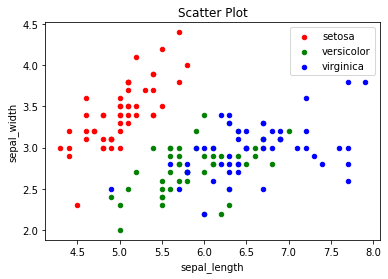

In [7]:
ax = df[df.species=='setosa'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                    color='red', label='setosa')
df[df.species=='versicolor'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='green', label='versicolor', ax=ax)
df[df.species=='virginica'].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("Scatter Plot")

In [8]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [9]:
data = df.values 

X=data [:, 0:5]
Y= data [: , -1]

print(X.shape)
print(Y.shape)

#train-test split = 3:1 

train_x = X[: 112, ]
train_y = Y[:112, ]

test_x = X[112:150, ]
test_y = Y[112:150, ]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(150, 5)
(150,)
(112, 5)
(112,)
(38, 5)
(38,)


In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_x, train_y)

# training predictions
train_labels= kmeans.predict(train_x)

#testing predictions
test_labels = kmeans.predict(test_x)

In [20]:

#training accuracy
print(accuracy_score(train_y, train_labels)*100)
#testing accuracy
print(accuracy_score(test_labels, test_y)*100)

0.8928571428571428
5.263157894736842


In [13]:
print(classification_report(train_y, train_labels))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        50
         1.0       0.00      0.00      0.00        50
         2.0       0.02      0.08      0.03        12

    accuracy                           0.01       112
   macro avg       0.01      0.03      0.01       112
weighted avg       0.00      0.01      0.00       112



In [19]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=2).fit(train_x,train_y)
prediction = clustering.predict(test_x, test_y)

AttributeError: 'DBSCAN' object has no attribute 'predict'